# Analysis of International Football Matches

## Overview

This project analyzes the results of international football matches, focusing on different aspects such as match outcomes, top goal scorers, and shootout outcomes. The analysis uses data spanning from 1870 to 2019, divided into 50-year and 10-year intervals to highlight trends and patterns over time.

### Objectives


- **Understand the distribution of match results**: Analyze how match outcomes have varied over different periods.
- **Examine the number of matches played**: Visualize the frequency of matches over time to identify trends.
- **Identify top goal scorers**: Highlight the players with the most goals in different eras.
- **Analyze shootout outcomes**: Examine the outcomes of shootouts in international matches.
- **Highlight top-performing countries**: Identify which countries have been the most successful in international football over different periods.

# Step 1: Loading and Checking the Data

Load the datasets and inspect their structure.

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
results = pd.read_csv('results.csv')
goalscorers = pd.read_csv('goalscorers.csv')
shootouts = pd.read_csv('shootouts.csv')

# Check the first few rows of each dataset
print("Results Dataset:")
print(results.head())
print("\nGoalscorers Dataset:")
print(goalscorers.head())
print("\nShootouts Dataset:")
print(shootouts.head())

# Check the summary of each dataset
print("\nResults Dataset Info:")
print(results.info())
print("\nGoalscorers Dataset Info:")
print(goalscorers.info())
print("\nShootouts Dataset Info:")
print(shootouts.info())

# Check for missing values
print("\nMissing Values in Results Dataset:")
print(results.isnull().sum())
print("\nMissing Values in Goalscorers Dataset:")
print(goalscorers.isnull().sum())
print("\nMissing Values in Shootouts Dataset:")
print(shootouts.isnull().sum())


Results Dataset:
         date home_team away_team  home_score  away_score tournament     city  \
0  1872-11-30  Scotland   England           0           0   Friendly  Glasgow   
1  1873-03-08   England  Scotland           4           2   Friendly   London   
2  1874-03-07  Scotland   England           2           1   Friendly  Glasgow   
3  1875-03-06   England  Scotland           2           2   Friendly   London   
4  1876-03-04  Scotland   England           3           0   Friendly  Glasgow   

    country  neutral  
0  Scotland    False  
1   England    False  
2  Scotland    False  
3   England    False  
4  Scotland    False  

Goalscorers Dataset:
         date  home_team away_team       team            scorer  minute  \
0  1916-07-02      Chile   Uruguay    Uruguay   José Piendibene    44.0   
1  1916-07-02      Chile   Uruguay    Uruguay  Isabelino Gradín    55.0   
2  1916-07-02      Chile   Uruguay    Uruguay  Isabelino Gradín    70.0   
3  1916-07-02      Chile   Uruguay  

# Step 3: Data Wrangling and Tidying

Clean and preprocess the data.

In [34]:
# date is in datetime format for all datasets
results['date'] = pd.to_datetime(results['date'])
goalscorers['date'] = pd.to_datetime(goalscorers['date'])
shootouts['date'] = pd.to_datetime(shootouts['date'])

# Drop any rows with missing values
results.dropna(inplace=True)
goalscorers.dropna(inplace=True)
shootouts.dropna(inplace=True)

# Check for duplicate rows
print("Duplicate Rows in Results Dataset:", results.duplicated().sum())
print("Duplicate Rows in Goalscorers Dataset:", goalscorers.duplicated().sum())
print("Duplicate Rows in Shootouts Dataset:", shootouts.duplicated().sum())

# Drop duplicate rows if any
results.drop_duplicates(inplace=True)
goalscorers.drop_duplicates(inplace=True)
shootouts.drop_duplicates(inplace=True)

# Verify changes
print("\nResults Dataset Info after Cleaning:")
print(results.info())
print("\nGoalscorers Dataset Info after Cleaning:")
print(goalscorers.info())
print("\nShootouts Dataset Info after Cleaning:")
print(shootouts.info())


Duplicate Rows in Results Dataset: 0
Duplicate Rows in Goalscorers Dataset: 10
Duplicate Rows in Shootouts Dataset: 0

Results Dataset Info after Cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47399 entries, 0 to 47398
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        47399 non-null  datetime64[ns]
 1   home_team   47399 non-null  object        
 2   away_team   47399 non-null  object        
 3   home_score  47399 non-null  int64         
 4   away_score  47399 non-null  int64         
 5   tournament  47399 non-null  object        
 6   city        47399 non-null  object        
 7   country     47399 non-null  object        
 8   neutral     47399 non-null  bool          
dtypes: bool(1), datetime64[ns](1), int64(2), object(5)
memory usage: 2.9+ MB
None

Goalscorers Dataset Info after Cleaning:
<class 'pandas.core.frame.DataFrame'>
Index: 44092 entries, 0 to 44361
Data columns

# Step 3: Exploratory Data Analysis

Conduct EDA to understand the data better.

# Distribution of Match Results (50-Year Intervals)

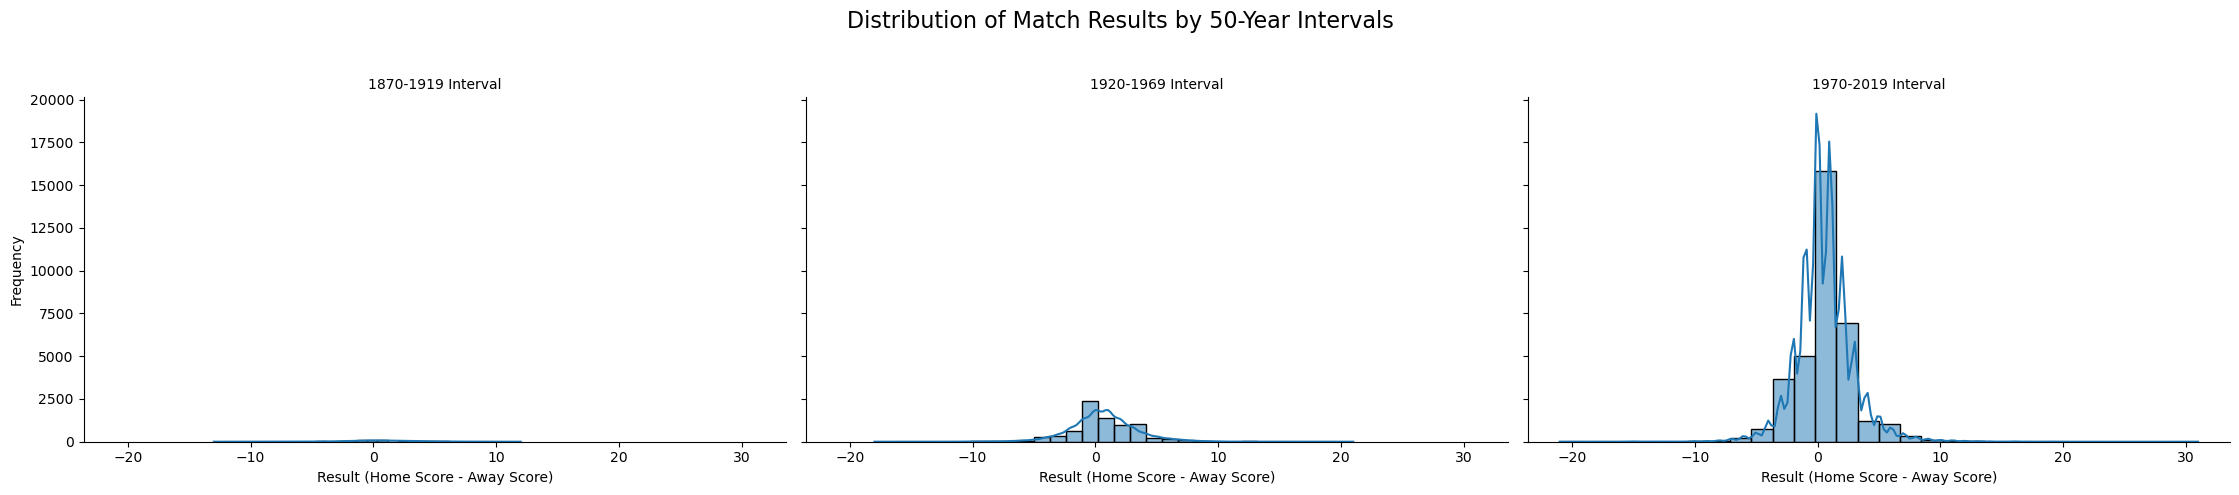

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract year from date
results['year'] = results['date'].dt.year

# Create 50-year intervals
bins = [1870, 1920, 1970, 2020]
labels = ['1870-1919', '1920-1969', '1970-2019']
results['50_year_bin'] = pd.cut(results['year'], bins=bins, labels=labels)

# Distribution of match results
results['result'] = results['home_score'] - results['away_score']

# Use FacetGrid to create separate histograms for each 50-year interval
g = sns.FacetGrid(results, col='50_year_bin', col_wrap=3, height=5, aspect=1.5)
g.map(sns.histplot, 'result', bins=30, kde=True)

# titles and labels
g.set_titles("{col_name} Interval")
g.set_axis_labels('Result (Home Score - Away Score)', 'Frequency')
g.fig.suptitle('Distribution of Match Results by 50-Year Intervals', fontsize=16)
g.fig.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to fit title

plt.show()


# Number of Matches per 50 year interval 

C:\Users\rhnsa\AppData\Local\Temp\ipykernel_7480\2832715803.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=matches_per_interval.index, y=matches_per_interval.values, palette='viridis')


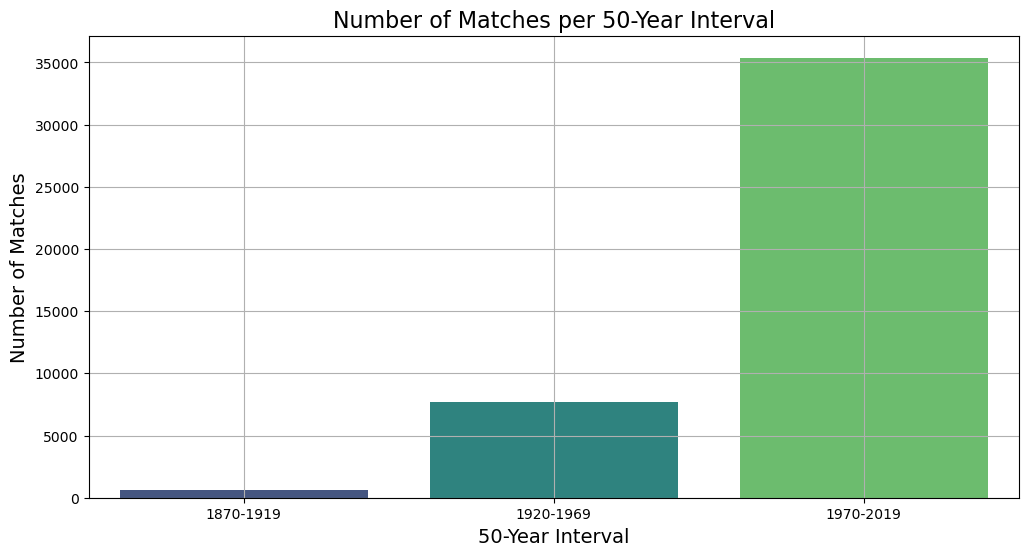

In [38]:
# Number of matches per 50-year interval
matches_per_interval = results['50_year_bin'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
sns.barplot(x=matches_per_interval.index, y=matches_per_interval.values, palette='viridis')
plt.title('Number of Matches per 50-Year Interval', fontsize=16)
plt.xlabel('50-Year Interval', fontsize=14)
plt.ylabel('Number of Matches', fontsize=14)
plt.grid(True)
plt.show()


# Top 10 Goal Scorers per 50-Year Interval

C:\Users\rhnsa\AppData\Local\Temp\ipykernel_7480\3469323478.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=interval_scorers.values, y=interval_scorers.index, palette='magma')


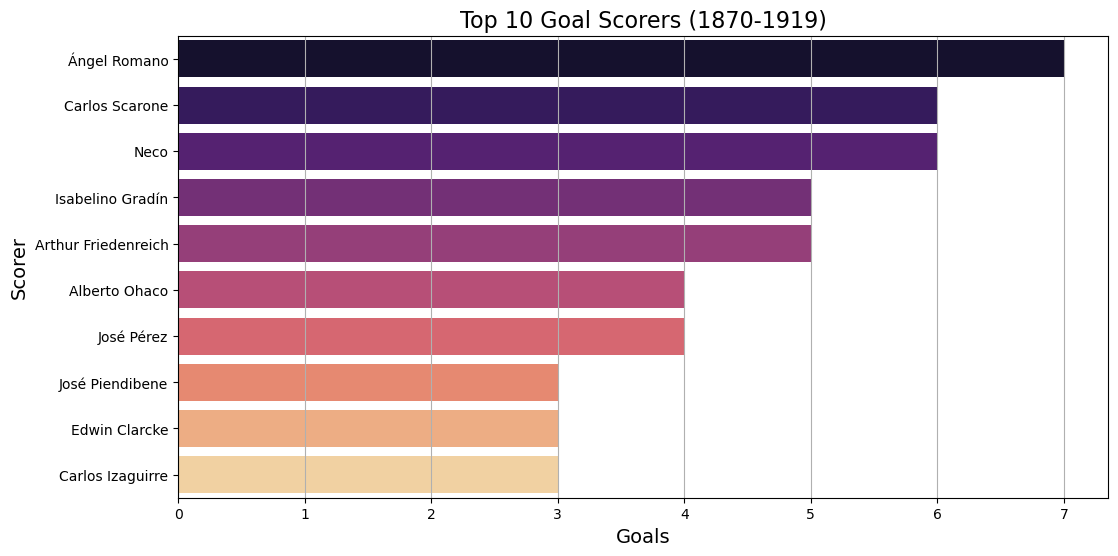

C:\Users\rhnsa\AppData\Local\Temp\ipykernel_7480\3469323478.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=interval_scorers.values, y=interval_scorers.index, palette='magma')


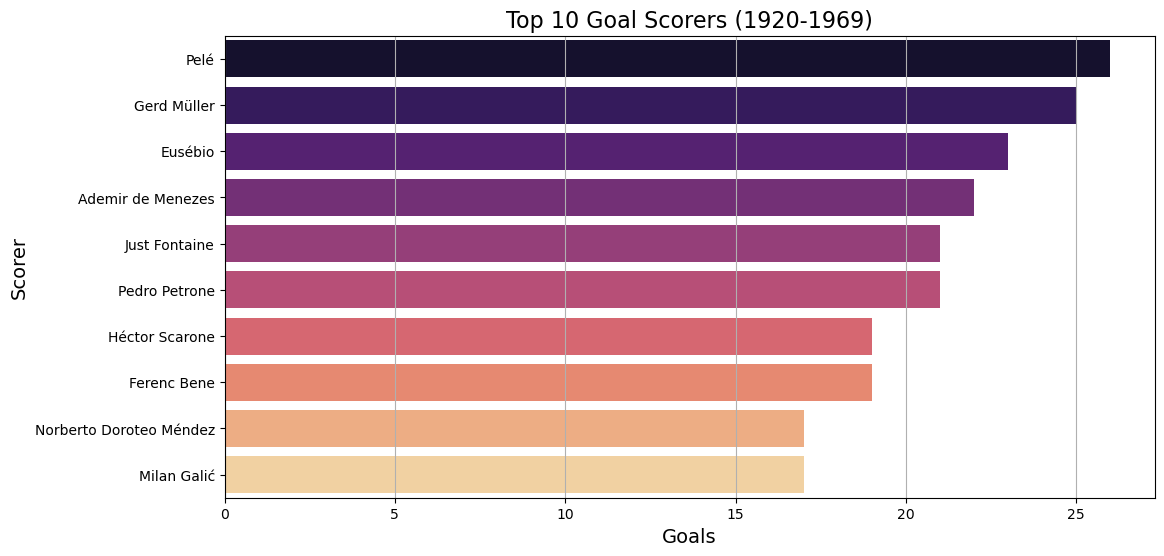

C:\Users\rhnsa\AppData\Local\Temp\ipykernel_7480\3469323478.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=interval_scorers.values, y=interval_scorers.index, palette='magma')


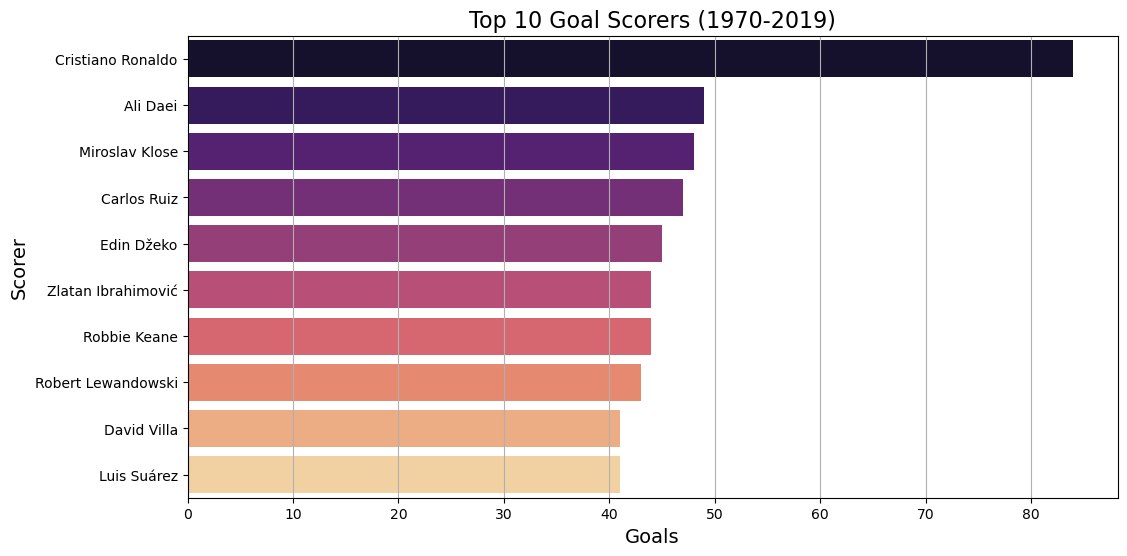

In [40]:
# Extract year from date
goalscorers['year'] = goalscorers['date'].dt.year

# Create 50-year intervals
goalscorers['50_year_bin'] = pd.cut(goalscorers['year'], bins=bins, labels=labels)

# Top 10 goal scorers per interval
for interval in labels:
    interval_scorers = goalscorers[goalscorers['50_year_bin'] == interval]['scorer'].value_counts().head(10)
    plt.figure(figsize=(12, 6))
    sns.barplot(x=interval_scorers.values, y=interval_scorers.index, palette='magma')
    plt.title(f'Top 10 Goal Scorers ({interval})', fontsize=16)
    plt.xlabel('Goals', fontsize=14)
    plt.ylabel('Scorer', fontsize=14)
    plt.grid(True, axis='x')
    plt.show()


# Analysis of Shootout Outcomes from 1970 -2019 (10 year time interval)

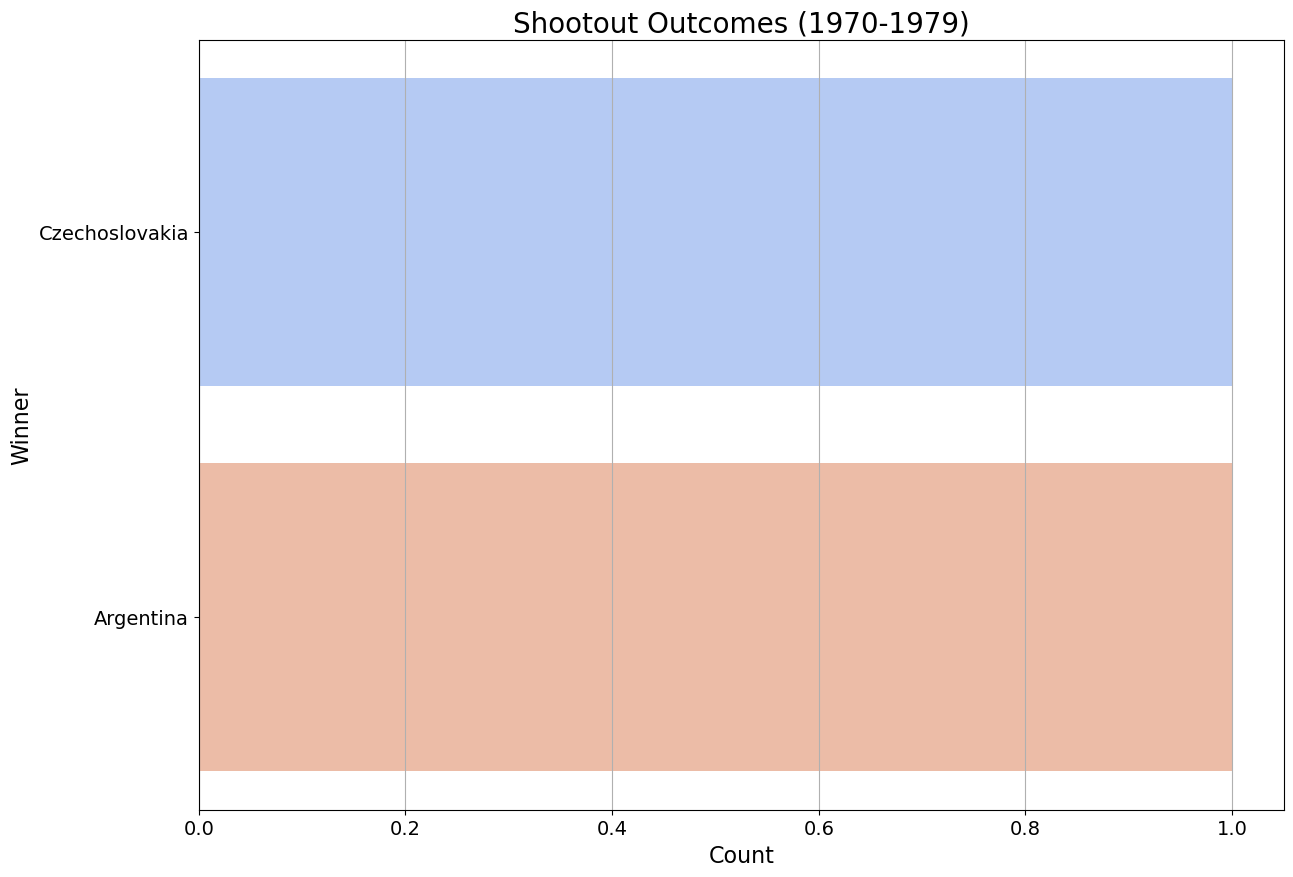

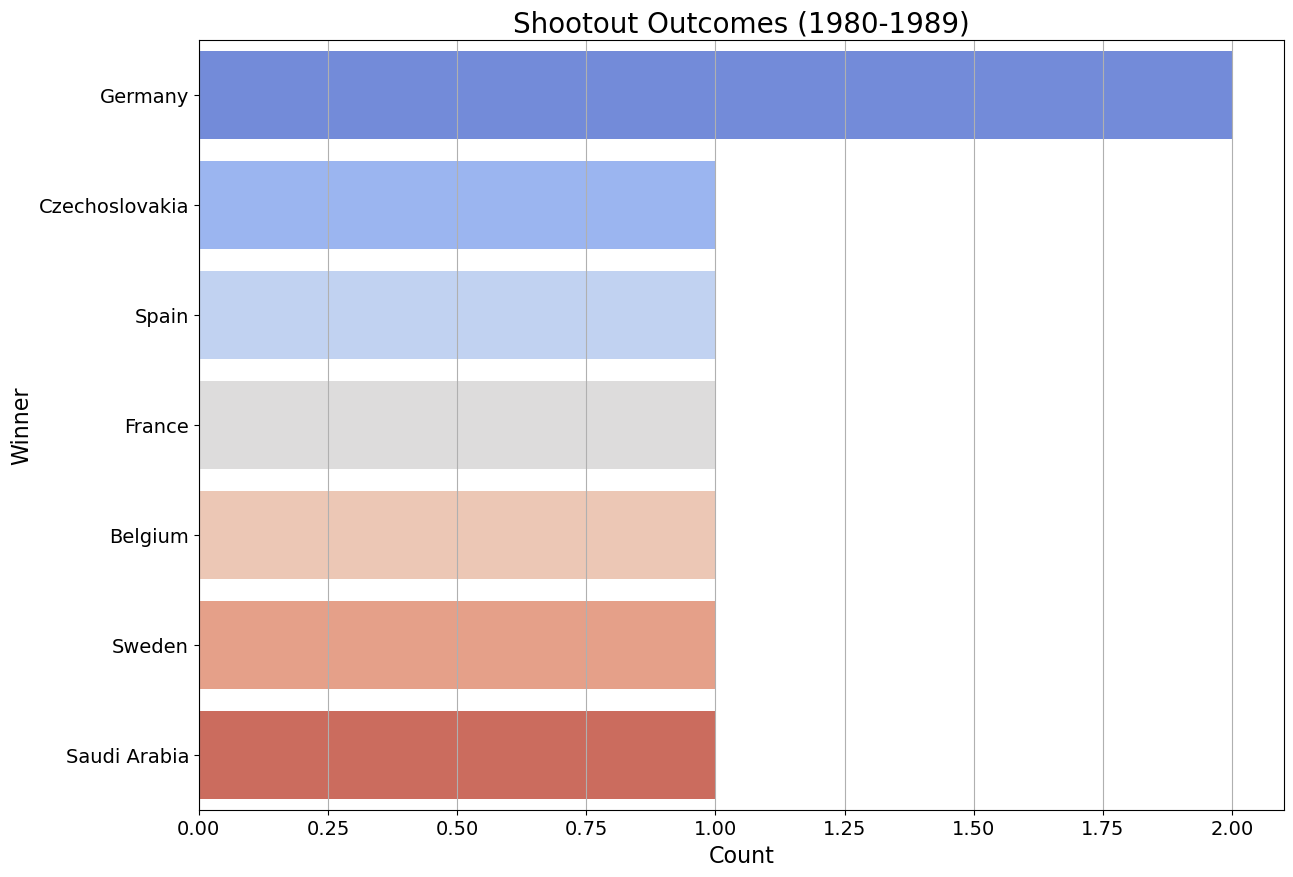

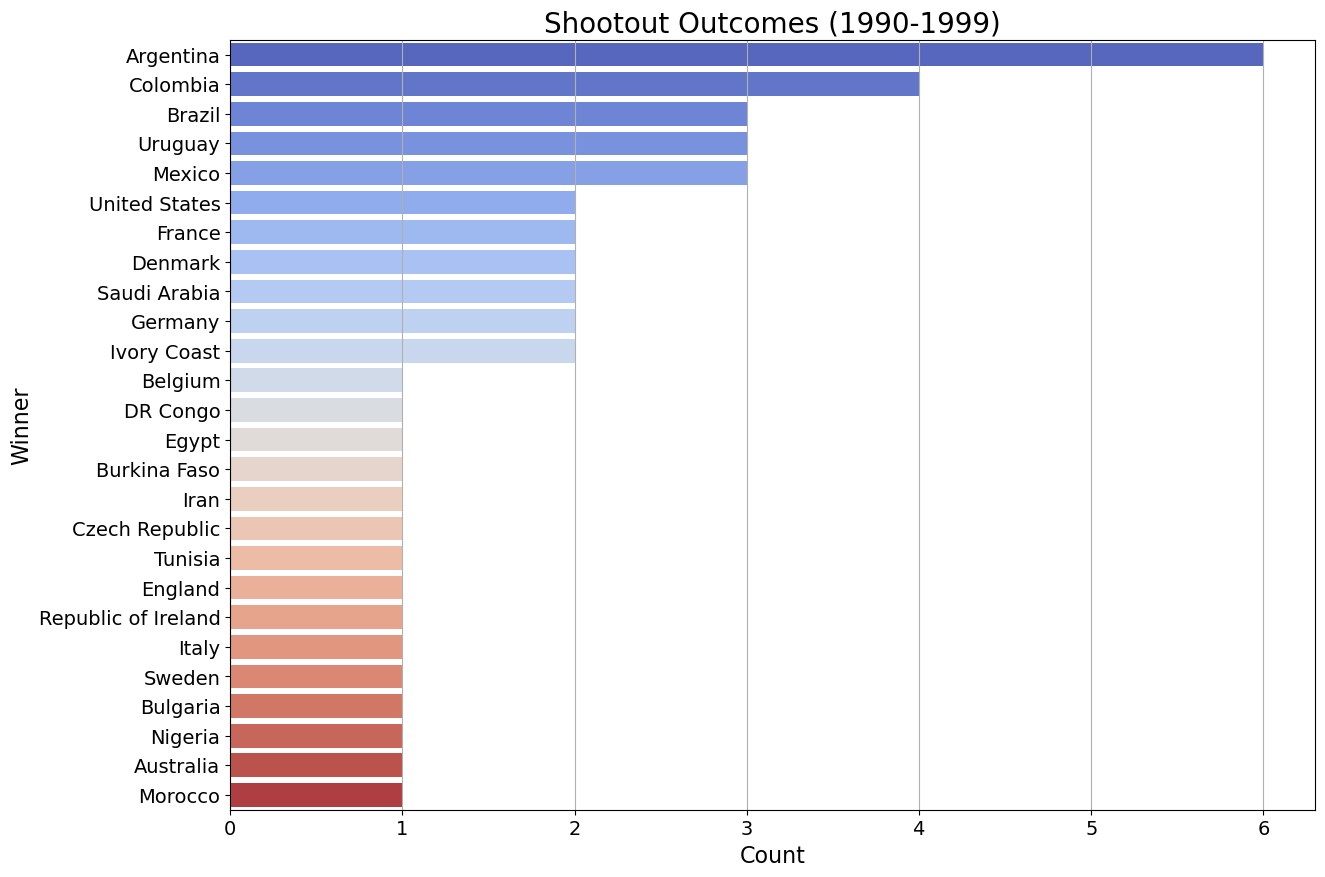

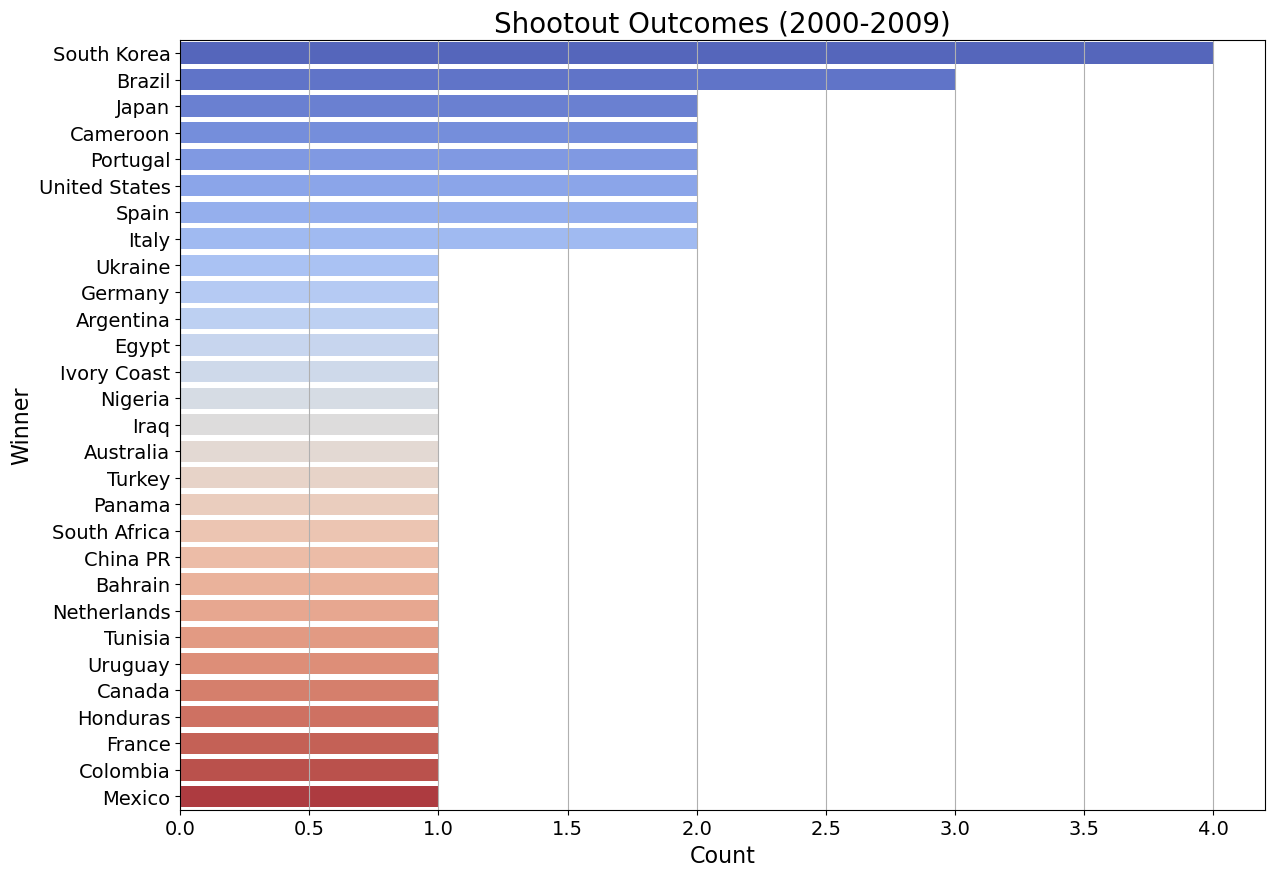

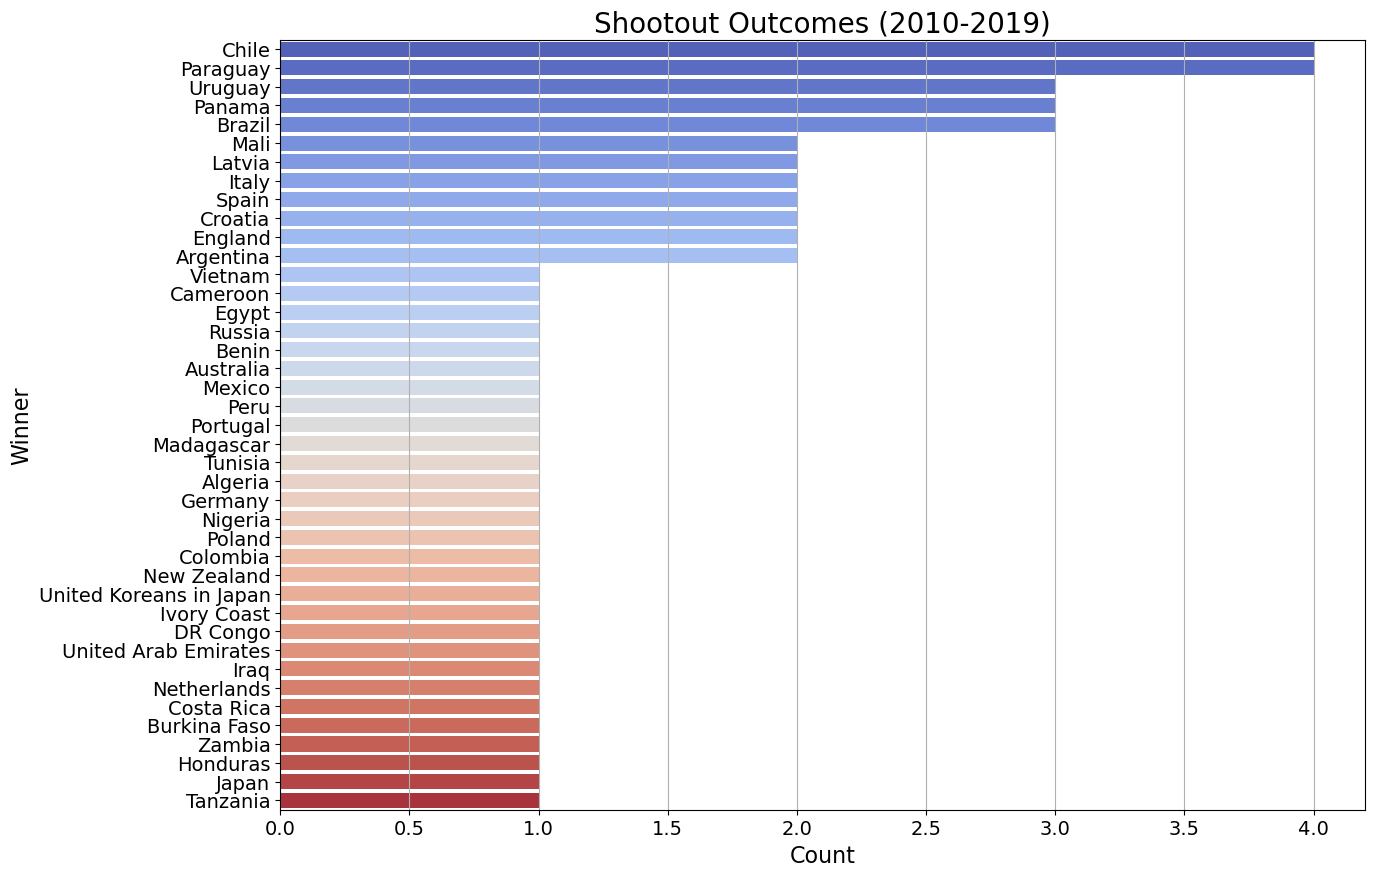

In [42]:
# date is in datetime format for shootouts dataset
shootouts['date'] = pd.to_datetime(shootouts['date'])

# Extract year from date
shootouts['year'] = shootouts['date'].dt.year

# Filter for the 1970-2019 interval
filtered_shootouts = shootouts[(shootouts['year'] >= 1970) & (shootouts['year'] <= 2019)]

# Create 10-year intervals within the 1970-2019 range for better readability
bins = [1970, 1980, 1990, 2000, 2010, 2020]
labels = ['1970-1979', '1980-1989', '1990-1999', '2000-2009', '2010-2019']
filtered_shootouts = filtered_shootouts.assign(ten_year_bin=pd.cut(filtered_shootouts['year'], bins=bins, labels=labels, right=False))

# Analysis of shootout outcomes per 10-Year Interval
for interval in labels:
    interval_outcomes = filtered_shootouts[filtered_shootouts['ten_year_bin'] == interval]['winner'].value_counts()
    plt.figure(figsize=(14, 10))
    sns.barplot(x=interval_outcomes.values, y=interval_outcomes.index, hue=interval_outcomes.index, dodge=False, palette='coolwarm', legend=False)
    plt.title(f'Shootout Outcomes ({interval})', fontsize=20)
    plt.xlabel('Count', fontsize=16)
    plt.ylabel('Winner', fontsize=16)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14, rotation=0, ha="right") 
    plt.grid(True, axis='x')
    plt.show()

# Top 10 Countries with the Most Wins per 50-Year Interval

C:\Users\rhnsa\AppData\Local\Temp\ipykernel_7480\1219409117.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=interval_wins.values, y=interval_wins.index, palette='coolwarm')


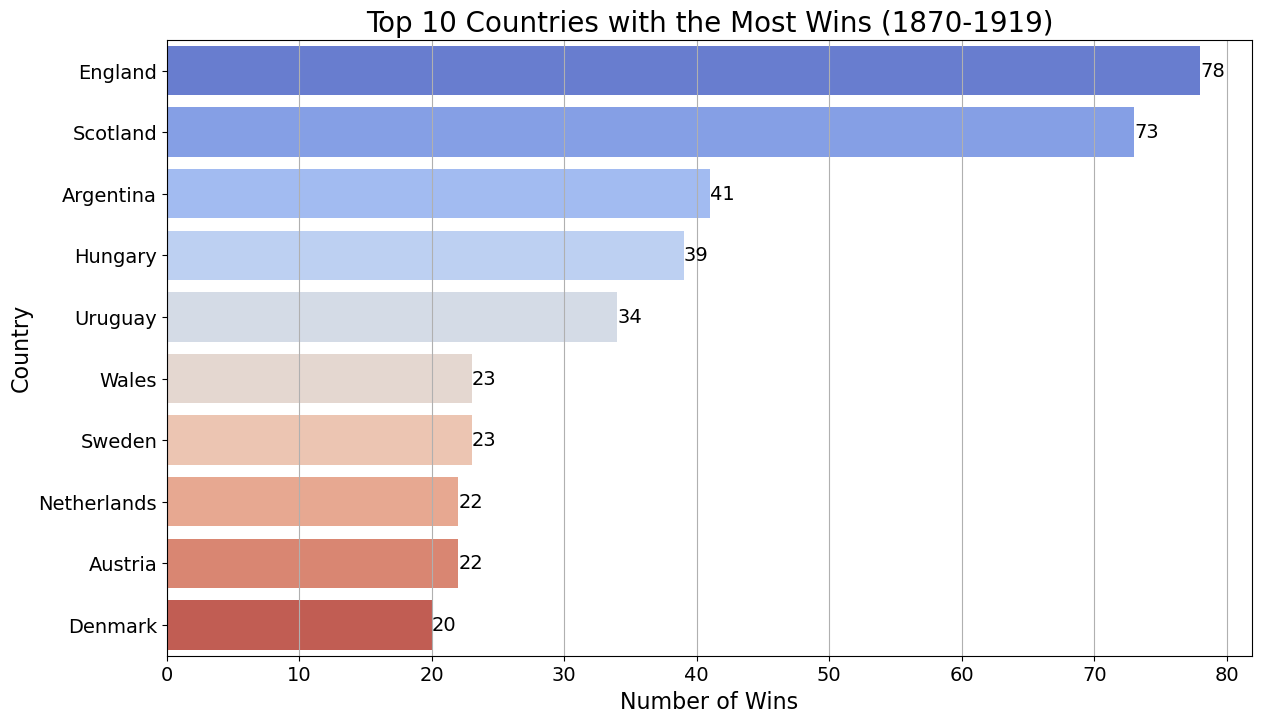

C:\Users\rhnsa\AppData\Local\Temp\ipykernel_7480\1219409117.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=interval_wins.values, y=interval_wins.index, palette='coolwarm')


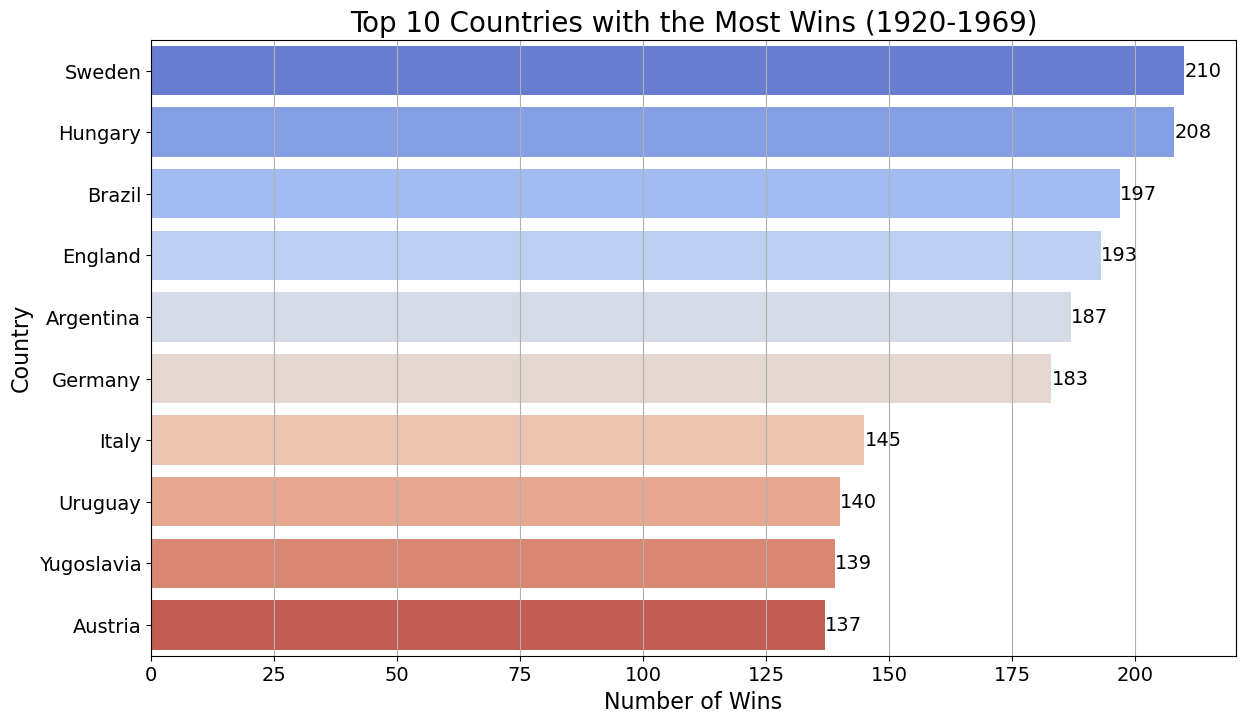

C:\Users\rhnsa\AppData\Local\Temp\ipykernel_7480\1219409117.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=interval_wins.values, y=interval_wins.index, palette='coolwarm')


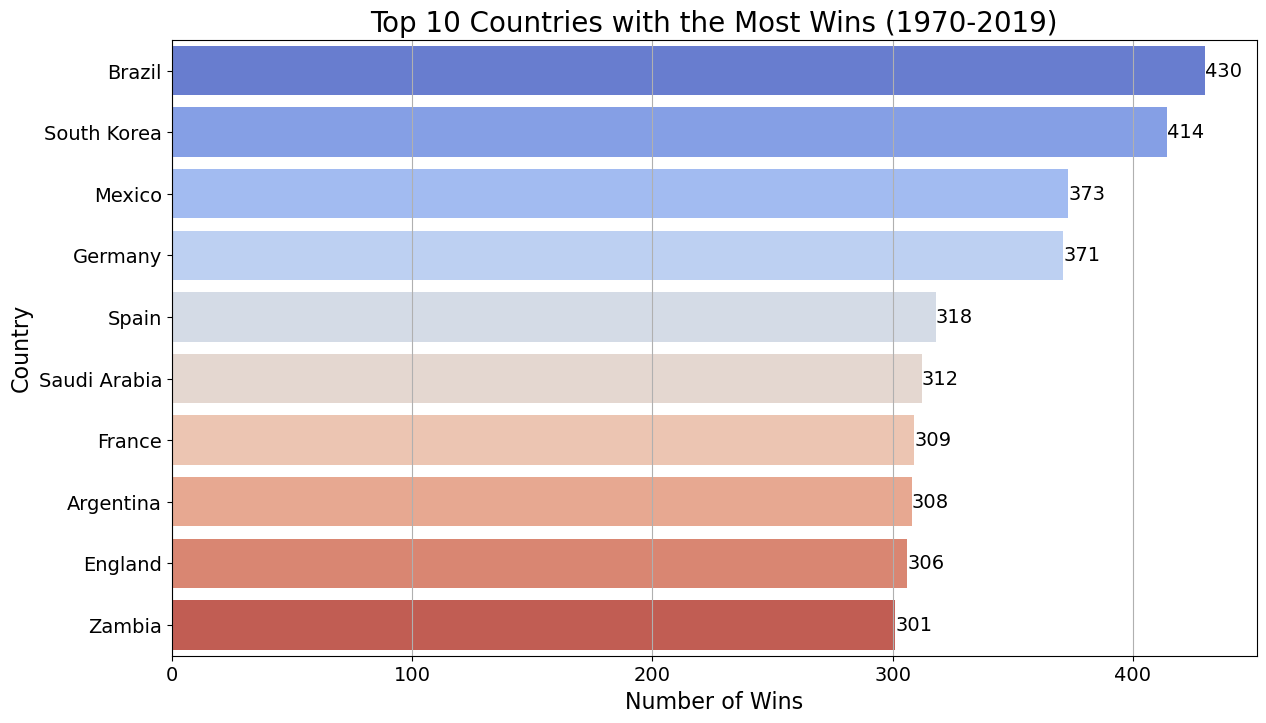

In [70]:
# Determine the winner of each match in the results dataset
results['winner'] = results.apply(lambda row: row['home_team'] if row['home_score'] > row['away_score'] else (row['away_team'] if row['away_score'] > row['home_score'] else 'Draw'), axis=1)

# Enhanced Visualization of Top 10 countries with the most wins per interval
for interval in labels:
    interval_data = results[(results['50_year_bin'] == interval)]
    interval_wins = interval_data[interval_data['winner'] != 'Draw']['winner'].value_counts().head(10)
    
    plt.figure(figsize=(14, 8))
    sns.barplot(x=interval_wins.values, y=interval_wins.index, palette='coolwarm')
    plt.title(f'Top 10 Countries with the Most Wins ({interval})', fontsize=20)
    plt.xlabel('Number of Wins', fontsize=16)
    plt.ylabel('Country', fontsize=16)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    
    # Adding value labels on the bars
    for index, value in enumerate(interval_wins.values):
        plt.text(value, index, str(value), fontsize=14, va='center')
    
    plt.grid(True, axis='x')
    plt.show()


## Summary of Findings

- The results dataset contains results of international football matches.
- The goalscorers dataset lists players and their goals in various matches.
- The shootouts dataset provides information about shootouts and their outcomes.
- The distribution of match results shows that most matches are closely contested, with a result of zero being the most frequent outcome.
- By dividing the data into 50-year intervals, we can see how the distribution of match results varies over time. The FacetGrid visualization helps in comparing these intervals effectively.
- The number of matches per year has increased over time, with notable increases in certain periods.
- The top 10 goal scorers for different 50-year intervals highlight the players who dominated in different eras.
- The analysis of shootout outcomes provides insights into the frequency of different outcomes over various 50-year intervals.
- The top 10 countries with the most wins per 50-year interval reveal which countries have been most successful in international football over different periods.
- By focusing on the 1970-2019 interval and further breaking it down into 10-year intervals, we achieved better readability and more detailed insights into shootout outcomes.

## Visualizations
- **Distribution of Match Results by 50-Year Intervals**: Histograms show the frequency of match results over different 50-year intervals, making it easier to compare distributions.
- **Number of Matches per 50-Year Interval**: Bar plots highlight the number of matches played in each 50-year interval.
- **Top 10 Goal Scorers per 50-Year Interval**: Bar plots for each interval show the players with the most goals, highlighting changes in top scorers over time.
- **Shootout Outcomes per 10-Year Interval (1970-2019)**: Detailed bar plots for 10-year intervals within the 1970-2019 range provide a clear view of shootout outcomes.
- **Top 10 Countries with the Most Wins per 50-Year Interval**: Bar plots for each interval show the countries with the most wins, revealing dominant football nations in different eras.

These findings and visualizations provide a comprehensive overview of international football match results, goal scorers, and shootout outcomes, allowing for a detailed analysis of trends and patterns over time.
